<a href="https://colab.research.google.com/github/MeganBlazevic/deep-learning-challenge/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [ ]:
# URL for csv file
url = "https://raw.githubusercontent.com/MeganBlazevic/deep-learning-challenge/main/Resources/charity_data.csv"

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

In [ ]:
# Determine the number of unique values in each column.
for x in application_df.columns:
  print(x, len(application_df[x].unique()))

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [ ]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
count_binning = application_df['CLASSIFICATION'].value_counts()

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_types_to_replace = count_binning[count_binning > 1]
classification_types_to_replace

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(count_binning[count_binning < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis = 1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Attempt 1

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1 = 6
hidden_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_layer1, input_dim = input_features, activation = 'relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_layer2, activation = 'relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 300       
                                                                 
 dense_4 (Dense)             (None, 12)                84        
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, validation_split = 0.15, epochs = 100)

Epoch 1/100
684/684 [==============================] - 4s 4ms/step - loss: 0.6324 - accuracy: 0.6728 - val_loss: 0.5757 - val_accuracy: 0.7258
Epoch 2/100
684/684 [==============================] - 2s 4ms/step - loss: 0.5783 - accuracy: 0.7191 - val_loss: 0.5623 - val_accuracy: 0.7318
Epoch 3/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5682 - accuracy: 0.7240 - val_loss: 0.5548 - val_accuracy: 0.7323
Epoch 4/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5636 - accuracy: 0.7259 - val_loss: 0.5527 - val_accuracy: 0.7354
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5600 - accuracy: 0.7274 - val_loss: 0.5514 - val_accuracy: 0.7362
Epoch 6/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5578 - accuracy: 0.7291 - val_loss: 0.5501 - val_accuracy: 0.7359
Epoch 7/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5565 - accuracy: 0.7286 - val_loss: 0.5519 - val_accuracy: 0.7336

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7280 - 467ms/epoch - 2ms/step
Loss: 0.55592280626297, Accuracy: 0.7280466556549072


<AxesSubplot:>

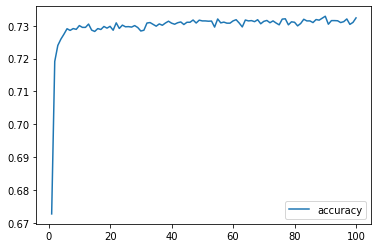

In [ ]:
# Plot the accuracy for easy visualization
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
from google.colab import drive
drive.mount("/content/drive")
nn.save("/../h5Files/AlphabetSoupCharity.h5")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Attempt 1: Accuracy 73% Loss Rate of .549
Layer 1 - 6; relu
Layer 2 - 12; relu
100 Epochs

## Optimize the Model
Looking to obtain a predicitive accuracy higher than 75%.  Will be running several of the last models, adjusting layers, activation functions, etc. 

### Attempt 2
2nd attempt - adding larger layers (9,18); adjusting layer 1 to tahn; adjusting to 75 epochs to limit the processing time. 

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1 = 9
hidden_layer2 = 18

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_layer1, input_dim = input_features, activation = 'tanh'))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_layer2, activation = 'relu'))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 9)                 450       
                                                                 
 dense_13 (Dense)            (None, 18)                180       
                                                                 
 dense_14 (Dense)            (None, 1)                 19        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, validation_split = 0.15, epochs = 75)

Epoch 1/75
684/684 [==============================] - 3s 3ms/step - loss: 0.5949 - accuracy: 0.6983 - val_loss: 0.5527 - val_accuracy: 0.7372
Epoch 2/75
684/684 [==============================] - 2s 4ms/step - loss: 0.5610 - accuracy: 0.7243 - val_loss: 0.5478 - val_accuracy: 0.7362
Epoch 3/75
684/684 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7261 - val_loss: 0.5446 - val_accuracy: 0.7385
Epoch 4/75
684/684 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7260 - val_loss: 0.5446 - val_accuracy: 0.7375
Epoch 5/75
684/684 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7286 - val_loss: 0.5441 - val_accuracy: 0.7372
Epoch 6/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5499 - accuracy: 0.7282 - val_loss: 0.5449 - val_accuracy: 0.7341
Epoch 7/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5494 - accuracy: 0.7305 - val_loss: 0.5446 - val_accuracy: 0.7357
Epoch 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5516 - accuracy: 0.7284 - 422ms/epoch - 2ms/step
Loss: 0.551633358001709, Accuracy: 0.728396475315094


<AxesSubplot:>

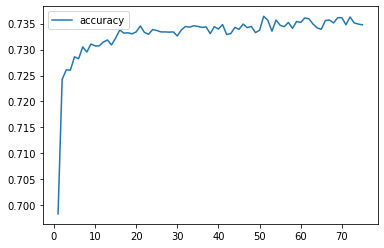

In [ ]:
# Plot the accuracy for easy visualization
history2_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history2_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
nn2.save('../h5Files/AlphabetSoupCharity2.h5')

Attempt 2: Accuracy 72.8%
Loss Rate of .552
Layer 1 - 9, Tahn; Layer 2 - 18 Relu

### Attempt 3

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1 = 7
hidden_layer2 = 14
hidden_layer3 = 21

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_layer1, input_dim = input_features, activation = 'relu'))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_layer2, activation = 'relu'))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_layer2, activation = 'relu'))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 7)                 350       
                                                                 
 dense_16 (Dense)            (None, 14)                112       
                                                                 
 dense_17 (Dense)            (None, 14)                210       
                                                                 
 dense_18 (Dense)            (None, 1)                 15        
                                                                 
Total params: 687
Trainable params: 687
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn3.fit(X_train_scaled, y_train, validation_split = 0.15, epochs = 100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.6377 - accuracy: 0.6531 - val_loss: 0.5790 - val_accuracy: 0.7219
Epoch 2/100
684/684 [==============================] - 3s 4ms/step - loss: 0.5760 - accuracy: 0.7203 - val_loss: 0.5595 - val_accuracy: 0.7362
Epoch 3/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5630 - accuracy: 0.7253 - val_loss: 0.5522 - val_accuracy: 0.7378
Epoch 4/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5572 - accuracy: 0.7259 - val_loss: 0.5484 - val_accuracy: 0.7341
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5547 - accuracy: 0.7271 - val_loss: 0.5464 - val_accuracy: 0.7365
Epoch 6/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7275 - val_loss: 0.5463 - val_accuracy: 0.7357
Epoch 7/100
684/684 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7275 - val_loss: 0.5472 - val_accuracy: 0.7362

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5543 - accuracy: 0.7303 - 420ms/epoch - 2ms/step
Loss: 0.5543237328529358, Accuracy: 0.7302623987197876


<AxesSubplot:>

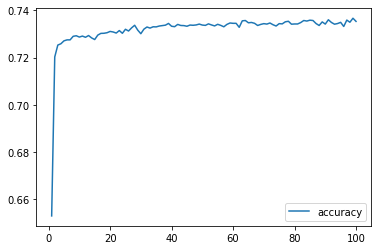

In [ ]:
# Plot the accuracy for easy visualization
history3_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history3_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
nn3.save('../h5Files/AlphabetSoupCharity3.h5')

3rd Attempt: still not at 75%; with a accuracy score of 73%.  Loss rate of .554.
Added a 3 layer.
Layer 1 - 7 with Relu; Layer 2 - 14 with Relu; Layer 3 - 21 with Relu
100 epochs

### Attempt 4
For attempt 4; I restarted my code by importing my data set as I am adjusting my binning.

In [ ]:
# URL for csv file
url = "https://raw.githubusercontent.com/MeganBlazevic/deep-learning-challenge/main/Resources/charity_data.csv"

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [ ]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv(url)

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

# Determine the number of unique values in each column.
for x in application_df.columns:
  print(x, len(application_df[x].unique()))

  # Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(count_binning[count_binning < 200].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis = 1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1 = 7
hidden_layer2 = 14
hidden_layer3 = 21

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_layer1, input_dim = input_features, activation = 'relu'))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_layer2, activation = 'relu'))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 7)                 378       
                                                                 
 dense_20 (Dense)            (None, 14)                112       
                                                                 
 dense_21 (Dense)            (None, 1)                 15        
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn4.fit(X_train_scaled, y_train, validation_split = 0.15, epochs = 75)

Epoch 1/75
684/684 [==============================] - 7s 6ms/step - loss: 0.6288 - accuracy: 0.6820 - val_loss: 0.5757 - val_accuracy: 0.7258
Epoch 2/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5722 - accuracy: 0.7202 - val_loss: 0.5585 - val_accuracy: 0.7305
Epoch 3/75
684/684 [==============================] - 2s 2ms/step - loss: 0.5633 - accuracy: 0.7214 - val_loss: 0.5540 - val_accuracy: 0.7334
Epoch 4/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5602 - accuracy: 0.7245 - val_loss: 0.5522 - val_accuracy: 0.7328
Epoch 5/75
684/684 [==============================] - 2s 4ms/step - loss: 0.5581 - accuracy: 0.7264 - val_loss: 0.5503 - val_accuracy: 0.7341
Epoch 6/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.7271 - val_loss: 0.5508 - val_accuracy: 0.7346
Epoch 7/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5552 - accuracy: 0.7278 - val_loss: 0.5489 - val_accuracy: 0.7328
Epoch 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5534 - accuracy: 0.7296 - 418ms/epoch - 2ms/step
Loss: 0.5534141063690186, Accuracy: 0.7295626997947693


<AxesSubplot:>

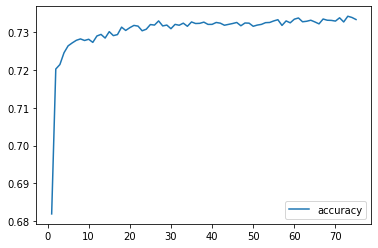

In [ ]:
# Plot the accuracy for easy visualization
history4_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history4_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
nn4.save('../h5Files/AlphabetSoupCharity4.h5')

Attempt 4. Decreasing the number of binning; did not solve the issue as hoped.
Accuracy rate of 72.9%; loss rate of .553

### Attempt 5 | Final Hope
For this attempt, I restarted running the code from the begining, as I am not dropping all of the original columns that were originally deemed unnecesary - in attempt to get over the 75% accurancy rate threshold. 

In [ ]:
# URL for csv file
url = "https://raw.githubusercontent.com/MeganBlazevic/deep-learning-challenge/main/Resources/charity_data.csv"

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Read the charity_data.csv.
application_df = pd.read_csv(url)

In [ ]:
# Drop the non-beneficial ID columns, see what happens if I keep the name column in it
application_df = application_df.drop(columns = ['EIN'])

# Determine the number of unique values in each column.
for x in application_df.columns:
  print(x, len(application_df[x].unique()))

  # Look at APPLICATION_TYPE value counts for binning
countsName = application_df['NAME'].value_counts()
countsName

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
names_to_replace = list(countsName[countsName<500].index)

In [ ]:
# Replace in dataframe
for name in names_to_replace:
  application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                 31574
PARENT BOOSTER USA INC                 1260
TOPS CLUB INC                           765
UNITED STATES BOWLING CONGRESS INC      700
Name: NAME, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
count_binning = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(count_binning[count_binning < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis = 1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1 = 7
hidden_layer2 = 14
hidden_layer3 = 21

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units = hidden_layer1, input_dim = input_features, activation = 'relu'))

# Second hidden layer
nn5.add(tf.keras.layers.Dense(units = hidden_layer2, activation = 'relu'))

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 434       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn5.fit(X_train_scaled, y_train, validation_split = 0.15, epochs = 75)

Epoch 1/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.7319 - val_loss: 0.5340 - val_accuracy: 0.7362
Epoch 2/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5335 - accuracy: 0.7324 - val_loss: 0.5337 - val_accuracy: 0.7375
Epoch 3/75
684/684 [==============================] - 3s 5ms/step - loss: 0.5336 - accuracy: 0.7324 - val_loss: 0.5360 - val_accuracy: 0.7370
Epoch 4/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5337 - accuracy: 0.7319 - val_loss: 0.5337 - val_accuracy: 0.7354
Epoch 5/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.7324 - val_loss: 0.5341 - val_accuracy: 0.7375
Epoch 6/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5330 - accuracy: 0.7330 - val_loss: 0.5344 - val_accuracy: 0.7365
Epoch 7/75
684/684 [==============================] - 2s 3ms/step - loss: 0.5328 - accuracy: 0.7318 - val_loss: 0.5341 - val_accuracy: 0.7372
Epoch 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5416 - accuracy: 0.7312 - 506ms/epoch - 2ms/step
Loss: 0.5415506958961487, Accuracy: 0.731195330619812


<AxesSubplot:>

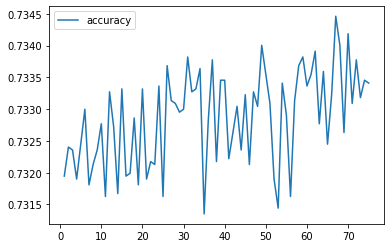

In [ ]:
# Plot the accuracy for easy visualization
history5_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history5_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
nn5.save('h5Files/AlphabetSoupCharity5.h5')